# EXPLORANDO TRACEROUTES 


## DESCRIBIR ESTATUS DE LAS MEDICIONES

1. Request status de las mediciones
2. Convertir los datos en un dataframe
3. Minar informacion

## ANALISIS DE  RESULTADOS DE TRACEROUTES

1. Request resultado de medicion.
2. Convertir los datos en un dataframe
3. Minar informacion






In [42]:
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()
#api_key = os.getenv("API_KEY")
import requests
import time


In [43]:
# Atlas Script Process
class Ripe_Client ():
    def __init__(self):
        self.base_url="https://atlas.ripe.net/api/v2"
        self.api_key= os.getenv("API_KEY")


    def get_measurment_status(self,mst_id):
        # Check measurement status
        status_url = f"{self.base_url}/measurements/{mst_id}"
        headers = {"Authorization": f"Key {self.api_key}"}
        response = requests.get(status_url, headers=headers)
        status_data = response.json()
        #print("Measurement Status:", status_data)
        return status_data

    
    def get_measurment_data(self,mst_id):
        #get the data of the probes involved in the measurements
        results_url = f"{self.base_url}/measurements/{mst_id}/results/"
        headers = {"Authorization": f"Key {self.api_key}"}
        response = requests.get(results_url, headers=headers)
        results_data = response.json()
        #print("Measurement Results:", results_data)
        return results_data
        

    def schedule_meassure(self,data):
        #create the measure with the given data
        headers = {"Content-Type": "application/json","Authorization": f"Key {self.api_key}"}
        response = requests.post(f"{self.base_url}/measurements", headers=headers, json=data)
        #output->> {'measurements': [73201825]}
        exct = response.json()
        self.mst_id = exct['measurements'][0]
        



In [44]:
file = "/home/augusto/lacnic/notebooks/mst_ids.csv"
df = pd.read_csv(file)
df

,group_id,count
0,73358277,1
1,73740001,1
2,73741027,1
3,73784066,1
4,73801575,1
...,...,...
360,76462435,1
361,76462457,1
362,76468885,1
363,76468915,1


In [45]:
# Start the object atlas
atlas = Ripe_Client()

In [46]:
atlas.get_measurment_status("73358277")

{'af': 4,
 'creation_time': 1718344665,
 'credits_per_result': 60,
 'description': 'Ping to tiktok.com',
 'destination_option_size': None,
 'dont_fragment': None,
 'duplicate_timeout': 10,
 'estimated_results_per_day': 20,
 'first_hop': 1,
 'gap_limit': None,
 'group': 'https://atlas.ripe.net/api/v2/measurements/groups/73358277/',
 'group_id': 73358277,
 'hop_by_hop_option_size': None,
 'id': 73358277,
 'in_wifi_group': False,
 'interval': None,
 'is_all_scheduled': True,
 'is_oneoff': True,
 'is_public': True,
 'max_hops': 32,
 'packets': 3,
 'paris': 16,
 'participant_count': 20,
 'port': 80,
 'probes_requested': 20,
 'probes_scheduled': 20,
 'protocol': 'ICMP',
 'resolve_on_probe': True,
 'resolved_ips': ['104.110.240.195',
  '104.110.240.203',
  '104.110.240.202',
  '104.110.240.201',
  '104.110.240.232',
  '104.110.240.233',
  '104.110.240.227',
  '104.110.240.194',
  '104.110.240.192'],
 'response_timeout': 4000,
 'result': 'https://atlas.ripe.net/api/v2/measurements/73358277/res

In [47]:
# 1. Request status de las mediciones
mediciones_estatus = []

start = time.time()

for idx,row in df.iterrows():
     x = row["group_id"]
     temp =  atlas.get_measurment_status(x)
     mediciones_estatus.append(temp)

end = time.time()
print(f"Tiempo de ejecución: {end - start:.4f} segundos")




Tiempo de ejecución: 221.0071 segundos


In [48]:
len(mediciones_estatus)

365

In [49]:
# 2. Convertir los datos en un dataframe
mst_results = pd.DataFrame(mediciones_estatus)
mst_results

,af,creation_time,credits_per_result,description,destination_option_size,dont_fragment,duplicate_timeout,estimated_results_per_day,first_hop,gap_limit,...,start_time,status,stop_time,tags,target,target_asn,target_ip,target_prefix,traffic_class,type
0,4,1718344665,60,Ping to tiktok.com,None,None,10,20,1,None,...,1718344665,"{'id': 4, 'name': 'Stopped', 'when': 1718345102}",1718345102,[],www.tiktok.com,20940,104.110.240.195,104.110.240.0/24,None,traceroute
1,4,1718773801,60,Ping to tiktok.com,None,None,10,20,1,None,...,1718773801,"{'id': 4, 'name': 'Stopped', 'when': 1718774103}",1718774103,[],www.tiktok.com,20940,23.72.252.59,23.72.252.0/24,None,traceroute
2,4,1718775003,60,Trace to tiktok.com,None,None,10,20,1,None,...,1718775003,"{'id': 4, 'name': 'Stopped', 'when': 1718775602}",1718775602,[],www.tiktok.com,20940,23.72.252.90,23.72.252.0/24,None,traceroute
3,4,1718820003,60,Trace to tiktok.com,None,None,10,20,1,None,...,1718820003,"{'id': 4, 'name': 'Stopped', 'when': 1718820303}",1718820303,[],www.tiktok.com,20940,104.110.240.219,104.110.240.0/24,None,traceroute
4,4,1718838002,60,Trace to tiktok.com,None,None,10,20,1,None,...,1718838002,"{'id': 4, 'name': 'Stopped', 'when': 1718838602}",1718838602,[],www.tiktok.com,20940,23.72.252.89,23.72.252.0/24,None,traceroute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,4,1722535275,60,Trace to www.meta.com,None,None,10,16,1,None,...,1722535275,"{'id': 4, 'name': 'Stopped', 'when': 1722535802}",1722535802,[],www.meta.com,32934,157.240.201.17,157.240.201.0/24,None,traceroute
361,4,1722535349,60,Trace to www.youtube.com,None,None,10,16,1,None,...,1722535349,"{'id': 4, 'name': 'Stopped', 'when': 1722535802}",1722535802,[],www.youtube.com,15169,142.250.179.174,142.250.0.0/15,None,traceroute
362,4,1722553202,60,Trace to www.tiktok.com,None,None,10,16,1,None,...,1722553202,"{'id': 4, 'name': 'Stopped', 'when': 1722553802}",1722553802,[],www.tiktok.com,20940,104.110.240.219,104.110.240.0/24,None,traceroute
363,4,1722553276,60,Trace to www.meta.com,None,None,10,16,1,None,...,1722553276,"{'id': 4, 'name': 'Stopped', 'when': 1722553802}",1722553802,[],www.meta.com,32934,157.240.201.17,157.240.201.0/24,None,traceroute


In [50]:
mst_results.groupby("target_asn").size()

target_asn
15169     98
20940    169
32934     98
dtype: int64

In [51]:
mst_results.groupby(['target','target_ip',"target_asn"]).size()

target           target_ip        target_asn
www.meta.com     157.240.201.17   32934         98
www.tiktok.com   104.110.240.194  20940          2
                 104.110.240.195  20940         16
                 104.110.240.203  20940          3
                 104.110.240.208  20940          3
                 104.110.240.209  20940          1
                 104.110.240.210  20940          6
                 104.110.240.211  20940          4
                 104.110.240.216  20940          4
                 104.110.240.217  20940         11
                 104.110.240.218  20940         22
                 104.110.240.219  20940         75
                 104.110.240.226  20940          3
                 104.110.240.227  20940         11
                 104.110.240.232  20940          5
                 23.72.252.59     20940          1
                 23.72.252.89     20940          1
                 23.72.252.90     20940          1
www.youtube.com  142.250.102.190  151

# Resultado de Traceroutes




In [52]:
traces = []

start = time.time()

for idx,row in df.iterrows():
     x = row["group_id"]
     temp =  atlas.get_measurment_data(x)
     traces += temp

end = time.time()
print(f"Tiempo de ejecución: {end - start:.4f} segundos")


Tiempo de ejecución: 318.1951 segundos


In [20]:
type(traces)

list

In [21]:
len(traces)

5921

In [22]:
traces[0]

{'fw': 5040,
 'mver': '2.4.1',
 'lts': 37,
 'endtime': 1718344716,
 'dst_name': 'www.tiktok.com',
 'ttr': 59.570485,
 'dst_addr': '23.201.195.155',
 'src_addr': '192.168.1.33',
 'proto': 'ICMP',
 'af': 4,
 'size': 48,
 'paris_id': 1,
 'result': [{'hop': 1,
   'result': [{'from': '192.168.1.1', 'ttl': 64, 'size': 76, 'rtt': 0.94},
    {'from': '192.168.1.1', 'ttl': 64, 'size': 76, 'rtt': 0.824},
    {'from': '192.168.1.1', 'ttl': 64, 'size': 76, 'rtt': 0.91}]},
  {'hop': 2,
   'result': [{'from': '10.70.0.1', 'ttl': 63, 'size': 76, 'rtt': 1.398},
    {'from': '10.70.0.1', 'ttl': 63, 'size': 76, 'rtt': 1.833},
    {'from': '10.70.0.1', 'ttl': 63, 'size': 76, 'rtt': 1.837}]},
  {'hop': 3,
   'result': [{'from': '45.238.188.129', 'ttl': 253, 'size': 68, 'rtt': 1.949},
    {'from': '45.238.188.129', 'ttl': 253, 'size': 68, 'rtt': 1.472},
    {'from': '45.238.188.129', 'ttl': 253, 'size': 68, 'rtt': 2.017}]},
  {'hop': 4,
   'result': [{'from': '8.243.219.205', 'ttl': 251, 'size': 28, 'rtt':

In [23]:
trace_results = pd.DataFrame(traces)
trace_results 

,fw,mver,lts,endtime,dst_name,ttr,dst_addr,src_addr,proto,af,...,result,destination_ip_responded,msm_id,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp
0,5040,2.4.1,37,1718344716,www.tiktok.com,59.570485,23.201.195.155,192.168.1.33,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '192.168.1.1',...",True,73358277,1003249,1718344667,Traceroute,45.238.188.144,traceroute,73358277,1718344717
1,5060,2.5.1,3,1718344705,www.tiktok.com,83.953238,104.97.2.138,192.168.1.110,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '192.168.1.254...",True,73358277,1004112,1718344667,Traceroute,189.174.31.12,traceroute,73358277,1718344706
2,5080,2.6.2,4,1718344668,www.tiktok.com,7.962550,23.64.121.40,192.168.1.111,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '192.168.1.254...",True,73358277,1004979,1718344667,Traceroute,187.173.149.178,traceroute,73358277,1718344669
3,5080,2.6.2,24,1718344667,www.tiktok.com,0.874699,23.64.121.19,200.25.81.165,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '200.25.81.98'...",True,73358277,1006632,1718344667,Traceroute,200.25.81.165,traceroute,73358277,1718344668
4,5080,2.6.2,6,1718344672,www.tiktok.com,4.594371,23.64.121.65,172.18.0.2,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '172.18.0.1', ...",True,73358277,1008340,1718344667,Traceroute,187.155.19.64,traceroute,73358277,1718344673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,5040,2.4.1,34,1722553352,www.youtube.com,34.101434,172.217.3.142,192.168.1.36,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '192.168.1.1',...",True,76468932,1003249,1722553351,Traceroute,45.238.188.144,traceroute,76468932,1722553353
5917,5080,2.6.2,11,1722553423,www.youtube.com,32.525437,192.178.56.110,192.168.100.5,ICMP,4,...,"[{'hop': 1, 'result': [{'x': '*'}, {'x': '*'},...",True,76468932,60714,1722553350,Traceroute,177.240.30.196,traceroute,76468932,1722553424
5918,5080,2.6.2,18,1722553354,www.youtube.com,1.917643,172.217.12.142,10.17.38.65,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '10.17.63.254'...",True,76468932,60909,1722553351,Traceroute,187.228.64.162,traceroute,76468932,1722553355
5919,5080,2.6.2,5,1722553356,www.youtube.com,9.261933,192.178.56.238,172.18.0.2,ICMP,4,...,"[{'hop': 1, 'result': [{'from': '172.18.0.1', ...",True,76468932,1008340,1722553351,Traceroute,189.176.56.21,traceroute,76468932,1722553357


# Descripcion de los datos 



In [24]:
trace_results.groupby(['dst_name','destination_ip_responded']).size().reset_index(name="conteo")

,dst_name,destination_ip_responded,conteo
0,www.meta.com,False,3
1,www.meta.com,True,1503
2,www.tiktok.com,False,2
3,www.tiktok.com,True,2908
4,www.youtube.com,False,3
5,www.youtube.com,True,1502


In [25]:
trace_results.groupby(['dst_name','dst_addr','destination_ip_responded']).size().reset_index(name="conteo")

,dst_name,dst_addr,destination_ip_responded,conteo
0,www.meta.com,157.240.14.15,True,12
1,www.meta.com,157.240.19.19,True,129
2,www.meta.com,157.240.201.17,True,3
3,www.meta.com,157.240.214.1,True,52
4,www.meta.com,157.240.221.18,True,19
...,...,...,...,...
639,www.youtube.com,216.58.201.110,True,6
640,www.youtube.com,216.58.204.78,True,10
641,www.youtube.com,216.58.212.206,True,6
642,www.youtube.com,216.58.212.238,True,2


In [26]:
trace_results.groupby(["dst_name"])["ttr"].describe()


,count,mean,std,min,25%,50%,75%,max
dst_name,,,,,,,,
www.meta.com,1357.0,78.011834,664.497135,0.550378,8.258384,25.064957,59.872687,14994.956034
www.tiktok.com,2603.0,81.472701,543.307398,0.225437,7.000468,22.586860,60.142490,14996.732647
www.youtube.com,1360.0,165.818448,1025.947486,0.234225,5.128672,9.911909,28.756346,14992.607067


In [27]:
# contando el numero de hops por ruta
def count_hops(trace):
    return len(trace)


In [28]:
trace_results['hops'] = trace_results['result'].apply(count_hops)

In [29]:
trace_results

,fw,mver,lts,endtime,dst_name,ttr,dst_addr,src_addr,proto,af,...,destination_ip_responded,msm_id,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp,hops
0,5040,2.4.1,37,1718344716,www.tiktok.com,59.570485,23.201.195.155,192.168.1.33,ICMP,4,...,True,73358277,1003249,1718344667,Traceroute,45.238.188.144,traceroute,73358277,1718344717,11
1,5060,2.5.1,3,1718344705,www.tiktok.com,83.953238,104.97.2.138,192.168.1.110,ICMP,4,...,True,73358277,1004112,1718344667,Traceroute,189.174.31.12,traceroute,73358277,1718344706,15
2,5080,2.6.2,4,1718344668,www.tiktok.com,7.962550,23.64.121.40,192.168.1.111,ICMP,4,...,True,73358277,1004979,1718344667,Traceroute,187.173.149.178,traceroute,73358277,1718344669,6
3,5080,2.6.2,24,1718344667,www.tiktok.com,0.874699,23.64.121.19,200.25.81.165,ICMP,4,...,True,73358277,1006632,1718344667,Traceroute,200.25.81.165,traceroute,73358277,1718344668,6
4,5080,2.6.2,6,1718344672,www.tiktok.com,4.594371,23.64.121.65,172.18.0.2,ICMP,4,...,True,73358277,1008340,1718344667,Traceroute,187.155.19.64,traceroute,73358277,1718344673,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,5040,2.4.1,34,1722553352,www.youtube.com,34.101434,172.217.3.142,192.168.1.36,ICMP,4,...,True,76468932,1003249,1722553351,Traceroute,45.238.188.144,traceroute,76468932,1722553353,9
5917,5080,2.6.2,11,1722553423,www.youtube.com,32.525437,192.178.56.110,192.168.100.5,ICMP,4,...,True,76468932,60714,1722553350,Traceroute,177.240.30.196,traceroute,76468932,1722553424,15
5918,5080,2.6.2,18,1722553354,www.youtube.com,1.917643,172.217.12.142,10.17.38.65,ICMP,4,...,True,76468932,60909,1722553351,Traceroute,187.228.64.162,traceroute,76468932,1722553355,13
5919,5080,2.6.2,5,1722553356,www.youtube.com,9.261933,192.178.56.238,172.18.0.2,ICMP,4,...,True,76468932,1008340,1722553351,Traceroute,189.176.56.21,traceroute,76468932,1722553357,8


In [53]:
trace_results.groupby(["dst_name","hops"])["ttr"].describe()


count          mean          std           min  \
dst_name        hops                                                   
www.meta.com    1       2.0  14991.985578     4.200858  14989.015123   
                7     296.0     29.359789    34.346857      0.550378   
                8      27.0     12.005242     9.396858      0.636625   
                9     205.0     50.505576    27.096444      3.264946   
                10    109.0     66.775726    50.505128      4.674444   
                11     97.0     22.239473    15.113922      3.418756   
                12    154.0     21.332208    31.640390      1.739554   
                13    327.0     56.648018    67.988480      1.887537   
                14     37.0     16.077260    19.647276      3.510574   
                15     69.0    325.712689  1460.755914      3.537358   
                16     30.0     65.031947    13.981581     56.577824   
                17      3.0     77.310981    42.503730     50.368112   
                18      0.0           NaN          NaN           NaN   
                19      0.0           NaN          NaN           NaN   
                20      0.0           NaN          NaN           NaN   
                22      1.0     13.034957          NaN     13.034957   
                23      0.0           NaN          NaN           NaN   
www.tiktok.com  1       2.0  14994.087368     3.740989  14991.442089   
                5     501.0      9.288426    11.176772      0.361714   
                6     597.0      8.124395    11.475800      0.225437   
                7     120.0     66.304220   461.145673      0.859604   
                8       7.0     61.957642     1.970330     59.474375   
                9     144.0     34.375249    24.448700      1.767444   
                10    134.0     63.426727    48.170590      1.890682   
                11    131.0     58.351524    93.725390      6.210208   
                12     63.0    550.677663  1731.980900      6.255541   
                13    209.0    171.804876   508.113096      1.253716   
                14     34.0    183.346185   864.162543      6.980303   
                15    349.0     57.893438    28.322772      4.302185   
                16     48.0     74.649019    64.449142      1.809610   
                17    238.0    172.587923   172.968526      1.147358   
                18      5.0     46.495317    11.984715     30.356952   
                19      1.0      6.896286          NaN      6.896286   
                20      3.0     42.573812    12.344640     35.277334   
                21      6.0     56.636132    14.528932     31.376803   
                22      0.0           NaN          NaN           NaN   
                24      2.0     69.473686    21.656035     54.160556   
                25      5.0     62.263156    13.961584     53.235326   
                27      2.0     84.250290    32.444267     61.308728   
                28      2.0     37.389769     0.891556     36.759344   
www.youtube.com 1       2.0  14992.521503     0.121006  14992.435939   
                7     485.0     22.087640   226.900766      0.361115   
                8     292.0     16.969272    19.087225      1.115705   
                9     317.0    394.585779  1267.949303      1.180030   
                10     15.0     14.244889    35.914398      1.921088   
                11      1.0      4.645165          NaN      4.645165   
                12     10.0      8.465329    10.007400      1.851873   
                13     70.0    101.145499   274.299114      1.245155   
                14     78.0      0.472130     0.339992      0.234225   
                15     32.0   1293.432739  3363.853623      0.333581   
                16     29.0    202.475236   928.024524      0.328458   
                17     14.0      5.070906     1.427849      0.348329   
                18      8.0      0.463944     0.202559      0.265065   
                20      3.0      4.445181     3.593761      0.

In [31]:
import plotly.express as px


In [32]:
trace_results['fecha'] = pd.to_datetime(trace_results['timestamp'], unit='s')
# Formatear a dd/mm/aaaa
trace_results['fecha_str'] = trace_results['fecha'].dt.strftime('%d/%m/%Y')
trace_results

,fw,mver,lts,endtime,dst_name,ttr,dst_addr,src_addr,proto,af,...,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp,hops,fecha,fecha_str
0,5040,2.4.1,37,1718344716,www.tiktok.com,59.570485,23.201.195.155,192.168.1.33,ICMP,4,...,1003249,1718344667,Traceroute,45.238.188.144,traceroute,73358277,1718344717,11,2024-06-14 05:57:47,14/06/2024
1,5060,2.5.1,3,1718344705,www.tiktok.com,83.953238,104.97.2.138,192.168.1.110,ICMP,4,...,1004112,1718344667,Traceroute,189.174.31.12,traceroute,73358277,1718344706,15,2024-06-14 05:57:47,14/06/2024
2,5080,2.6.2,4,1718344668,www.tiktok.com,7.962550,23.64.121.40,192.168.1.111,ICMP,4,...,1004979,1718344667,Traceroute,187.173.149.178,traceroute,73358277,1718344669,6,2024-06-14 05:57:47,14/06/2024
3,5080,2.6.2,24,1718344667,www.tiktok.com,0.874699,23.64.121.19,200.25.81.165,ICMP,4,...,1006632,1718344667,Traceroute,200.25.81.165,traceroute,73358277,1718344668,6,2024-06-14 05:57:47,14/06/2024
4,5080,2.6.2,6,1718344672,www.tiktok.com,4.594371,23.64.121.65,172.18.0.2,ICMP,4,...,1008340,1718344667,Traceroute,187.155.19.64,traceroute,73358277,1718344673,7,2024-06-14 05:57:47,14/06/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,5040,2.4.1,34,1722553352,www.youtube.com,34.101434,172.217.3.142,192.168.1.36,ICMP,4,...,1003249,1722553351,Traceroute,45.238.188.144,traceroute,76468932,1722553353,9,2024-08-01 23:02:31,01/08/2024
5917,5080,2.6.2,11,1722553423,www.youtube.com,32.525437,192.178.56.110,192.168.100.5,ICMP,4,...,60714,1722553350,Traceroute,177.240.30.196,traceroute,76468932,1722553424,15,2024-08-01 23:02:30,01/08/2024
5918,5080,2.6.2,18,1722553354,www.youtube.com,1.917643,172.217.12.142,10.17.38.65,ICMP,4,...,60909,1722553351,Traceroute,187.228.64.162,traceroute,76468932,1722553355,13,2024-08-01 23:02:31,01/08/2024
5919,5080,2.6.2,5,1722553356,www.youtube.com,9.261933,192.178.56.238,172.18.0.2,ICMP,4,...,1008340,1722553351,Traceroute,189.176.56.21,traceroute,76468932,1722553357,8,2024-08-01 23:02:31,01/08/2024


In [33]:
df2 = trace_results.groupby(["fecha_str","dst_addr","dst_name","hops"])["ttr"].mean().reset_index(name="ttr_promedio")
# Convertir timestamp a datetime
df2


,fecha_str,dst_addr,dst_name,hops,ttr_promedio
0,01/07/2024,104.86.191.135,www.tiktok.com,17,84.509965
1,01/07/2024,104.86.191.137,www.tiktok.com,15,57.303085
2,01/07/2024,104.86.191.138,www.tiktok.com,15,53.742593
3,01/07/2024,104.86.191.138,www.tiktok.com,17,53.759047
4,01/07/2024,104.86.191.140,www.tiktok.com,17,113.654989
...,...,...,...,...,...
4130,30/06/2024,23.64.121.89,www.tiktok.com,16,NaN
4131,30/06/2024,23.64.121.91,www.tiktok.com,13,64.162759
4132,30/06/2024,23.64.121.96,www.tiktok.com,9,5.763382
4133,30/06/2024,23.64.121.98,www.tiktok.com,6,6.674583


In [34]:
df2 = df2.sort_values(by="ttr_promedio",ascending=False)
df2

,fecha_str,dst_addr,dst_name,hops,ttr_promedio
799,10/07/2024,23.64.121.18,www.tiktok.com,12,10093.153377
694,10/07/2024,142.251.34.46,www.youtube.com,15,10090.984323
715,10/07/2024,172.217.4.174,www.youtube.com,15,10033.297268
2356,22/06/2024,104.93.21.35,www.tiktok.com,14,5072.245343
3428,27/06/2024,23.63.230.18,www.tiktok.com,12,5069.481123
...,...,...,...,...,...
4117,30/06/2024,23.64.121.49,www.tiktok.com,12,NaN
4118,30/06/2024,23.64.121.51,www.tiktok.com,13,NaN
4120,30/06/2024,23.64.121.56,www.tiktok.com,16,NaN
4121,30/06/2024,23.64.121.57,www.tiktok.com,16,NaN


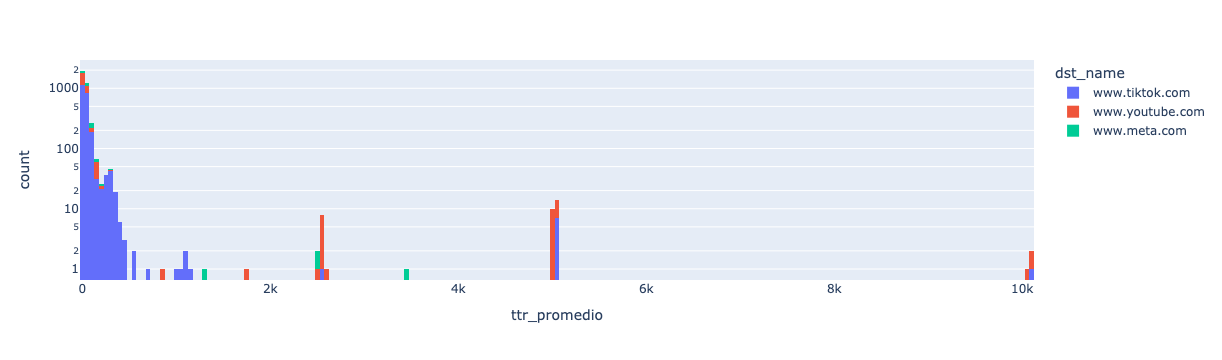

In [35]:
import plotly.express as px
#df = px.data.tips()
fig = px.histogram(df2, x='ttr_promedio',log_y=True,color='dst_name')
fig.show()

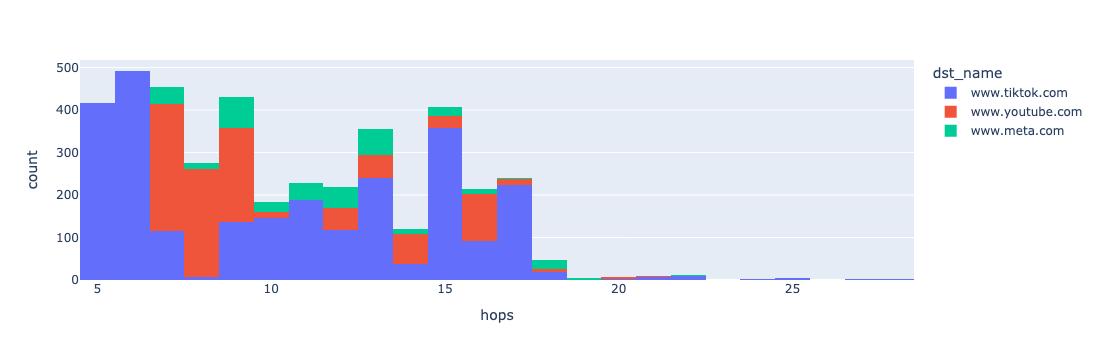

In [54]:
fig = px.histogram(df2, x='hops',color='dst_name')
fig.show()

In [37]:
import geoip2.database

def get_ip_coor(ip):
    with geoip2.database.Reader('GeoLite2-City_20250826/GeoLite2-City.mmdb') as reader:
    # Lookup city information for the given IP address
        response = reader.city(ip)
        
        #print(f"Country: {response.country.iso_code}")
        #print(f"City: {response.city.name} ")
        #print(f"Latitude: {response.location.latitude}")
        #print(f"Longitude: {response.location.longitude}")
    return (response.location.latitude,response.location.longitude),response.country.iso_code



def get_asn_info(ip):
    # Open the GeoLite2-ASN database
    try: 
        with geoip2.database.Reader('GeoLite2-ASN_20250826/GeoLite2-ASN.mmdb') as reader:
            # Lookup ASN information for the given IP address
            response = reader.asn(ip)
            #print(f"ASN: {response.autonomous_system_number}")
            #print(f"Organization: {response.autonomous_system_organization}")
            return response.autonomous_system_number,response.autonomous_system_organization
    except Exception as e:
        print(e)
        return "NA","NA"

In [55]:
get_ip_coor('23.64.121.18')

((20.85, -99.85), 'MX')

In [56]:
get_ip_coor('23.64.121.18')[1]

'MX'

In [57]:
get_asn_info('23.64.121.18')[1]

'Akamai International B.V.'